# Iris data set 

In [74]:
import numpy as np
import pandas as pd

# numpy and pandas are fundamental packages for scientific computing in Python.

In [75]:
data = pd.read_csv('dataset.csv')

# call a data set from a csv file on the same folder.

If we do not have a data set file, we can call it from sklearn as follows:

from sklearn import datasets by: iris_X, iris_y = datasets.load_iris(return_X_y=True)



In [76]:
data.describe()  #To convert the numpy array data to DataFrame; To generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
data.head()  # To preview the first (n) rows or () 5 rows of data in the DataFrame.

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
data.tail()  # To preview the last (n) rows or () bottom 5 rows of data in the DataFrame.

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [79]:
data.columns   # To show the columns' name of the DataFrame

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [80]:
null = data.isnull().sum()   # To find the number of missing values in the dataset.
print('null',null)

null sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64


In [81]:
data['class'].nunique()  # To find the number of unique values in the specific column.

3

In [82]:
data['class'].value_counts()  # How many number each unique values has.

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [83]:
data.dtypes  # To find the type of data.

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

## Data visualization

### matplotlib

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

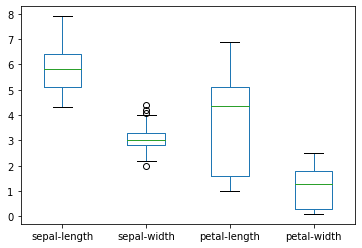

In [85]:
data.plot(kind='box', subplots=False, layout=(2,3), sharex=False, sharey=False)  # box and whisker plots
plt.show()

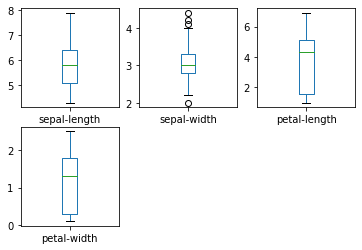

In [86]:
data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)  # box and whisker plots
plt.show()

As the column class is not in numeric form, in above plot there are just four panels. To plot the fifth panel, we have to convert the data of column class to numeric first as follows,

In [87]:
data['class'] = pd.Categorical(data['class'])
data['class'] = data['class'].cat.codes

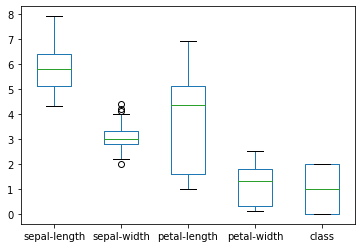

In [88]:
data.plot(kind='box', subplots=False, layout=(2,3), sharex=False, sharey=False)
plt.show()

## Distribution plot

#### A histogram representats the distribution of the data

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

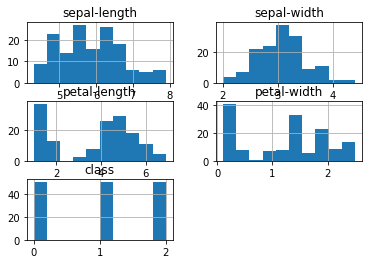

In [89]:
data.hist()

## Pair plots using scatter matrix from Pandas

Checking for collinearity among attributes of a dataset, is one of the most important steps in data preprocessing. A good way to understand the correlation among the features, is createing the scatter plots for each pair of attributes. Pandas has a function scatter_matrix(), for this purpose. scatter_matrix() can be used to easily generate a group of scatter plots between all pairs of numerical features. It creates a plot for each numerical feature against every other numerical feature and also a histogram for each of them.

<function matplotlib.pyplot.show(close=None, block=None)>

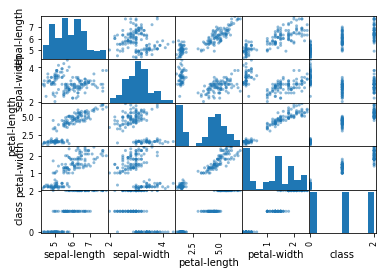

In [90]:
scatter_matrix(data)
plt.show

## Developed scatter plot

By adding more features to the scatter plots, we can have developed scatter plots.


In [91]:
def s_plot(x1, x2, l1, l2, x1min, x1max, x2min, x2max):
    plt.clf()
    plt.scatter(x1, x2, c = y, cmap = plt.cm.Set1, edgecolor = 'k')  #To separate different classes by different colors.
    plt.xlabel(l1)
    plt.ylabel(l2)
    plt.xlim(x1min, x1max)
    plt.ylim(x2min, x2max)
    plt.xticks(())
    plt.yticks(())

In [92]:
array = data.values
X = array[:,0:4]
y = array[:,4]

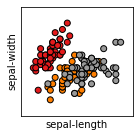

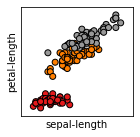

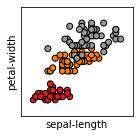

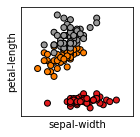

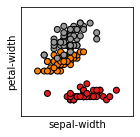

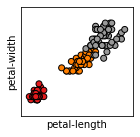

In [133]:
s = 0
for i in range(0,3):
    for j in range(i+1,4):
        s+=1 
        plt.figure(s, figsize = (2, 2))
        s_plot(X[:,i], X[:,j] ,data.columns[i] , data.columns[j], X[:,i].min()-0.5 , X[:,i].max() +0.5, X[:,j].min()-0.5 , X[:,j].max()+0.5)

# Learn the data

The Decision Tree Classifier, Logistic Regression, Random Forest are various algorithms to learn more about data.

### DecisionTreeClassifier

In [94]:
# to randolmly splitt data
from sklearn.model_selection import train_test_split

In [95]:
train, test = train_test_split(data, test_size = 0.3, stratify = data['class'], random_state = 42)

In [96]:
X_train = train[['sepal-length','sepal-width','petal-length','petal-width']]
y_train = train['class']
X_test = test[['sepal-length','sepal-width','petal-length','petal-width']]
y_test = test['class']

In [97]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# metrics: to find accuracy, i.e., difference between actual and predicted value of target
from sklearn import metrics

In [98]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction = mod_dt.predict(X_test)
# metrics.accuracy_score 
accuracy = metrics.accuracy_score(prediction,y_test)
print('The accuracy of the Decision Tree i',"{:.3f}".format(accuracy))

The accuracy of the Decision Tree i 0.933


In [99]:
# Decision tree classifier has a properties called maximum leaf. It can be changed from 1 to higher values.
# There is no fashion that increasing number of leaf gives rise in better results.
# Through the following code, we want to find out the optimum number of choice.

ACC_train = []
ACC_test = []
leaf = list(range(40))

for i in leaf:
    mod_dt = DecisionTreeClassifier(max_depth = i+1 , random_state = 1)
    mod_dt.fit(X_train,y_train)
    
    prediction_train = mod_dt.predict(X_train)
    prediction_test = mod_dt.predict(X_test)
    accuracy_train = metrics.accuracy_score(prediction_train,y_train)
    accuracy_test = metrics.accuracy_score(prediction_test,y_test)
    ACC_train.append(accuracy_train)
    ACC_test.append(accuracy_test)
    
print(ACC_train)
print(ACC_test)


[0.6666666666666666, 0.9714285714285714, 0.9809523809523809, 0.9904761904761905, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.6666666666666666, 0.8888888888888888, 0.9333333333333333, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777

# Exercise

#### Plot the above accuracy in terms of number of leafs


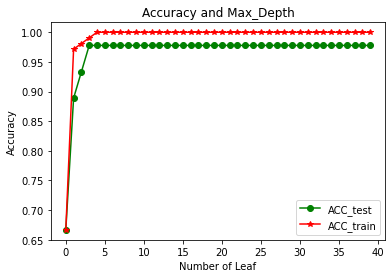

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

train, test = train_test_split(data, test_size = 0.3, stratify = data['class'], random_state = 42)
X_train = train[['sepal-length','sepal-width','petal-length','petal-width']]
y_train = train['class']
X_test = test[['sepal-length','sepal-width','petal-length','petal-width']]
y_test = test['class']

ACC_train = []
ACC_test = []
leaf = list(range(40))

for i in leaf:
    mod_dt = DecisionTreeClassifier(max_depth = i+1 , random_state = 1)
    mod_dt.fit(X_train,y_train)
    
    prediction_train = mod_dt.predict(X_train)
    prediction_test = mod_dt.predict(X_test)
    accuracy_train = metrics.accuracy_score(prediction_train,y_train)
    accuracy_test = metrics.accuracy_score(prediction_test,y_test)
    ACC_train.append(accuracy_train)
    ACC_test.append(accuracy_test)

plt.plot(leaf, ACC_test,  'o-', color='green', label='ACC_test')
plt.plot(leaf, ACC_train, '*-' ,color='red', label='ACC_train')
plt.xlabel('Number of Leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy and Max_Depth')
plt.show()
    

# Exercise

#### Change the answer list which is a python list to the pandas DataFrame where the columns are the number of leafs, accuracy of train and accuracy of test.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

train, test = train_test_split(data, test_size = 0.3, stratify = data['class'], random_state = 42)
X_train = train[['sepal-length','sepal-width','petal-length','petal-width']]
y_train = train['class']
X_test = test[['sepal-length','sepal-width','petal-length','petal-width']]
y_test = test['class']

ACC_train = []
ACC_test = []
leaf = list(range(1,21))

for i in leaf:
    mod_dt = DecisionTreeClassifier(max_depth = i , random_state = 1)
    mod_dt.fit(X_train,y_train)
    
    prediction_train = mod_dt.predict(X_train)
    prediction_test = mod_dt.predict(X_test)
    accuracy_train = metrics.accuracy_score(prediction_train,y_train)
    accuracy_test = metrics.accuracy_score(prediction_test,y_test)
    ACC_train.append(accuracy_train)
    ACC_test.append(accuracy_test)
    
df= pd.DataFrame({'ACC_train':ACC_train, 'ACC_test':ACC_test, 'Max_Depth':leaf})
df


,ACC_train,ACC_test,Max_Depth
0,0.666667,0.666667,1
1,0.971429,0.888889,2
2,0.980952,0.933333,3
3,0.990476,0.977778,4
4,1.000000,0.977778,5
5,1.000000,0.977778,6
6,1.000000,0.977778,7
7,1.000000,0.977778,8
8,1.000000,0.977778,9
9,1.000000,0.977778,10


# Logistic Regression

Logistic regression is a linear method.

C is the inverse of regularization parameter so C=zero means strong regularization. default of the model is 1.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

mdl = LogisticRegression(random_state = 0, C = 0.5, class_weight = 'balanced', solver = 'liblinear', max_iter = 100)
mdl.fit(X_train, y_train)
prediction_tr = mdl.predict(X_train)
prediction_tt = mdl.predict(X_test)
accuracy_tr = metrics.accuracy_score(prediction_tr,y_train)
accuracy_tt = metrics.accuracy_score(prediction_tt,y_test)

print(accuracy_tr)
print(accuracy_tt)

0.9619047619047619
0.8888888888888888


# exercise
#### Do the above code with nonlinear regularizaion. In order to do that, we have to manipulate features. Add more columns to the dataframe through features^2, features1*features2 and ... .

# Random Forest

As decision tree model tend to overfit fast. Thus, we use randomly many decision trees and at the end the results come from all of them. It has been called random forest.

Classifier gives the probability or 0/1 depends on what we ask.
Regression gives the mean value.

In [57]:
from sklearn.ensemble import RandomForestClassifier

# number of estimators shows how many trees considered in random forest.

mdl = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 1, min_samples_split = 2, max_features = 2)
mdl.fit(X_train, y_train)
prediction_tr = mdl.predict(X_train)
prediction_tt = mdl.predict(X_test)
accuracy_tr = metrics.accuracy_score(prediction_tr,y_train)
accuracy_tt = metrics.accuracy_score(prediction_tt,y_test)

print(accuracy_tr)
print(accuracy_tt)

1.0
0.9111111111111111


# Hyperparameter tunning

#### how to optimize the parameters of each model, e.g., maximum depth and ...

In [ ]:
from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
parameters = [{'n_estimators': [50,100,150,200], 'max_depth': [5,10,15,20],'min_samples_split': [1,2,3,4]}]
clf = GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())